In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR 
from sklearn.metrics import accuracy_score
import warnings 
import pickle
import pymongo
import configparser
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_csv("./data/adult.csv", na_values=['nan','?'])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
cols = {
    "education.num":"education_num",
    "marital.status":"marital_status",
    "capital.gain":"capital_gain",
    "capital.loss":"capital_loss",
    "hours.per.week":"hours_per_week",
    "native.country":"native_country"

}

df.rename(columns=cols, inplace=True)

In [4]:
print("Here is a detailed description of the dataset: \n")
df.info()
print("="*50)



Here is a detailed description of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Categorical Features
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [6]:
# Quantitative Features 
numer_columns = [column for column in df.columns if column not in categorical_columns]
numer_columns

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [7]:
print("Here are Missing Data Details:\n")
print(df.isnull().sum())
print("="*50)

Here are Missing Data Details:

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


***Features with Missing Values - workclass, occupation, native_country which are categorical features.***


***Missing Values of Categorical Features are imputed with mode() function***  

In [8]:
print("""Missing Values Information """)

# features = []
for i in categorical_columns:
    if df[i].isnull().sum() != 0:
        # features.append(i)
        print(f"{i}: {round(((df[i].isnull().sum()/len(df))*100),2)}%\n")
        
        df[i] = df[i].fillna(df[i].mode()[0])

        

Missing Values Information 
workclass: 5.64%

occupation: 5.66%

native_country: 1.79%



In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


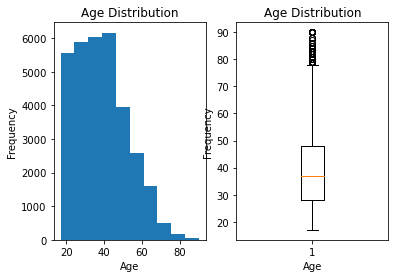

In [11]:
plt.subplot(1,2,1)
plt.hist(df['age'],histtype='bar',bins=10) 
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.subplot(1,2,2)
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

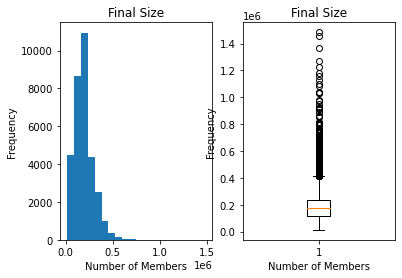

In [12]:
plt.subplot(1,2,1)
plt.hist(df['fnlwgt'],histtype='bar',bins=20) 
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.title('Final Size')

plt.subplot(1,2,2)
plt.boxplot(df['fnlwgt'])
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.title('Final Size')
plt.show()

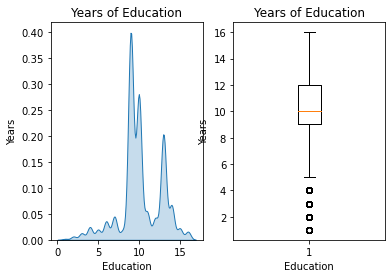

In [13]:
plt.subplot(1,2,1)
sns.kdeplot(df['education_num'], shade=True)
plt.xlabel('Education')
plt.ylabel('Years')
plt.title('Years of Education')

plt.subplot(1,2,2)
plt.boxplot(df['education_num'])
plt.xlabel('Education')
plt.ylabel('Years')
plt.title('Years of Education')
plt.show()

In [14]:
# Categorical Feature Analysis 

## MultiVariant Analysis

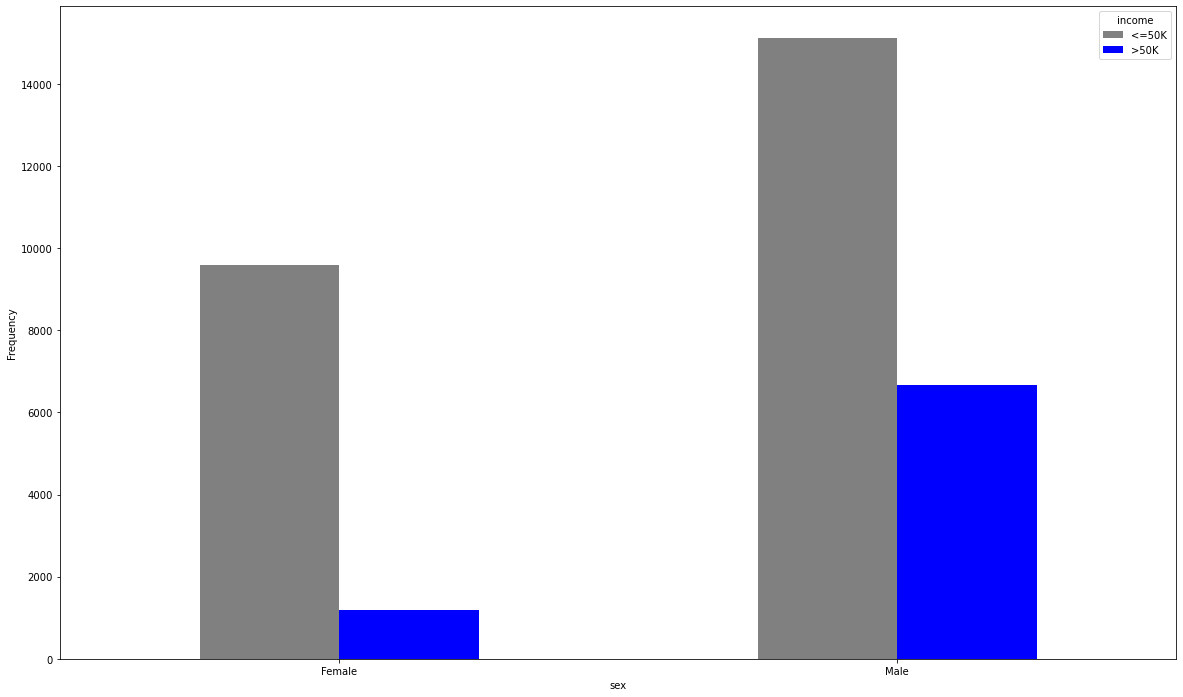

In [15]:
pd.crosstab(df['sex'],df['income']).plot(kind='bar',figsize=(20,12), color=["Grey","Blue"])
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

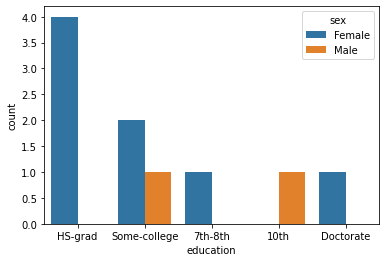

In [16]:
sns.countplot(x='education',hue='sex', data=df.head(10))
plt.show()